# Coordinate reference systems

This notebook demonstrates how to transform data between different coordinate reference systems (CRS)

In [1]:
%load_ext watermark

In [2]:
import geowombat as gw
from geowombat.data import oli_2016_1213

import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
%watermark -a "GeoWombat examples" -d -v -m -p dask,geowombat,geopandas,matplotlib,numpy,rasterio,xarray -g

GeoWombat examples 2020-04-02 

CPython 3.7.5
IPython 7.13.0

dask 2.13.0
geowombat 1.2.9
geopandas 0.7.0
matplotlib 3.2.1
numpy 1.18.2
rasterio 1.1.3
xarray 0.15.1

compiler   : GCC 8.3.0
system     : Linux
release    : 4.15.0-91-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : 3e0c9c881b50b9a6dd88c0e35a957051503576e2


---

# Transforming a CRS

Use the configuration manager to transform data. The reference CRS (`ref_crs`) can be any format accepted by **rasterio**. In this example, we use the EPSG code 102033, or [South America Albers Equal Area Conic](http://epsg.io/102033). We could also use the proj.4 string (`ref_crs`="+proj=aea +lat_1=-5 +lat_2=-42 +lat_0=-32 +lon_0=-60 +x_0=0 +y_0=0 +ellps=aust_SA +units=m +no_defs")

In [6]:
src_crs = 'EPSG:102033'

Note that the image CRS is EPSG:102033, so no warping is applied. This is just to demonstrate the use of the configuration manager.

In [7]:
with gw.config.update(ref_crs=src_crs):
    
    with gw.open(oli_2016_1213) as src:
        print(src)

<xarray.DataArray (band: 7, y: 926, x: 1419)>
dask.array<open_rasterio-2921b075f865e7a33fa6057c95ab7460<this-array>, shape=(7, 926, 1419), dtype=uint16, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7
  * y        (y) float64 -4.974e+03 -5.004e+03 ... -3.27e+04 -3.273e+04
  * x        (x) float64 -1.983e+05 -1.983e+05 ... -1.558e+05 -1.558e+05
Attributes:
    transform:   (30.003073249365293, 0.0, -198331.2594739152, 0.0, -30.00805...
    crs:         +init=epsg:102033
    res:         (30.003073249365293, 30.008057976603915)
    is_tiled:    1
    nodatavals:  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    filename:    /home/jcgr/Documents/scripts/Python/envs/ts3.7/lib/python3.7...
    resampling:  nearest


#### Note that in the `DataArray` attributes, the `crs` is stored as **+initi=epsg:102033** and the default resampling method is nearest neighbor (**resampling: nearest**). To use a different resampling method, use the `resampling` keyword argument in `gw.open()`. 

In [8]:
with gw.config.update(ref_crs=src_crs):
    
    with gw.open(oli_2016_1213, resampling='cubic') as src:
        print(src)

<xarray.DataArray (band: 7, y: 926, x: 1419)>
dask.array<open_rasterio-2921b075f865e7a33fa6057c95ab7460<this-array>, shape=(7, 926, 1419), dtype=uint16, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7
  * y        (y) float64 -4.974e+03 -5.004e+03 ... -3.27e+04 -3.273e+04
  * x        (x) float64 -1.983e+05 -1.983e+05 ... -1.558e+05 -1.558e+05
Attributes:
    transform:   (30.003073249365293, 0.0, -198331.2594739152, 0.0, -30.00805...
    crs:         +init=epsg:102033
    res:         (30.003073249365293, 30.008057976603915)
    is_tiled:    1
    nodatavals:  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    filename:    /home/jcgr/Documents/scripts/Python/envs/ts3.7/lib/python3.7...
    resampling:  cubic


# Warping data

The configuration manager can also be used to transform the data's spatial resolution. We could also use `ref_res`=30 to force square sample sizes.

In [9]:
with gw.config.update(ref_crs=src_crs, ref_res=(30, 30)):
    
    with gw.open(oli_2016_1213, resampling='nearest') as src:
        print(src)

<xarray.DataArray (band: 7, y: 926, x: 1419)>
dask.array<open_rasterio-2921b075f865e7a33fa6057c95ab7460<this-array>, shape=(7, 926, 1419), dtype=uint16, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7
  * y        (y) float64 -4.974e+03 -5.004e+03 ... -3.269e+04 -3.272e+04
  * x        (x) float64 -1.983e+05 -1.983e+05 ... -1.558e+05 -1.558e+05
Attributes:
    transform:   (30.0, 0.0, -198331.2594739152, 0.0, -30.0, -4959.415482769753)
    crs:         +init=epsg:102033
    res:         (30.0, 30.0)
    is_tiled:    1
    nodatavals:  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    scales:      (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
    offsets:     (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
    filename:    /home/jcgr/Documents/scripts/Python/envs/ts3.7/lib/python3.7...
    resampling:  nearest


#### Compare nearest neighbor resampling against cubic convolution

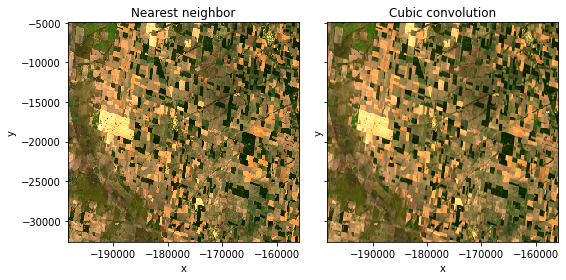

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

band_names = ['coastal', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2']
display_names = ['red', 'green', 'blue']

with gw.config.update(ref_crs=src_crs, ref_res=(100, 100)):
    
    with gw.open(oli_2016_1213,
                 band_names=band_names,
                 resampling='nearest') as src:
        
        src.sel(band=display_names).plot.imshow(robust=True, ax=ax1)
        
    with gw.open(oli_2016_1213,
                 band_names=band_names,
                 resampling='cubic') as src:
        
        src.sel(band=display_names).plot.imshow(robust=True, ax=ax2)        

ax1.set_title('Nearest neighbor', size=12)
ax2.set_title('Cubic convolution', size=12)

plt.tight_layout()

# Transforming opened DataArrays

If data have already been opened before a CRS transformation, they can be transformed using the GeoWombat `transform_crs()` function.

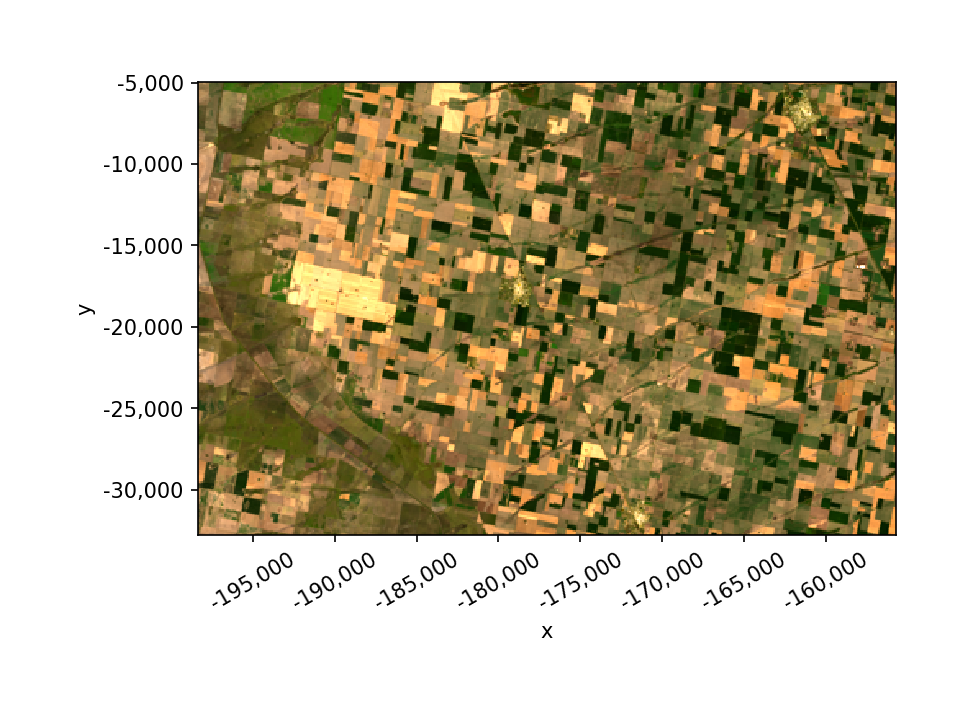

<Figure size 900x600 with 0 Axes>

In [11]:
with gw.open(oli_2016_1213,
             band_names=['coastal', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2']) as src:

    src_transformed = gw.transform_crs(src, dst_crs=src_crs, dst_res=(100, 100), resampling='cubic', num_threads=8)
    
    src_transformed.sel(band=['red', 'green', 'blue']).gw.imshow(robust=True)
    
plt.tight_layout()

# Transforming to UTM

To assist in locating intersecting UTM zones, we downloaded a shapefile of [global UTM zones](https://apps.gis.ucla.edu/geodata/dataset/world_utm_zones/resource/fc8af8e2-0818-4f50-baf0-2cc04cbaa541).

In [9]:
utm_df = gpd.read_file('utmzone.shp')

In [10]:
utm_df.head(2)

,ZONE,ROW_,WEST_VALUE,CM_VALUE,EAST_VALUE,Shape_Leng,Shape_Area,geometry
0,0.0,Y,NoZN,NoZN,NoZN,372.0,1080.000000,"POLYGON ((-180.000 84.000, -180.000 90.000, 0...."
1,0.0,Z,NoZN,NoZN,NoZN,372.0,1080.000001,"POLYGON ((0.000 90.000, 180.000 90.000, 180.00..."


Open the image and intersect the bounds with the global UTM zones

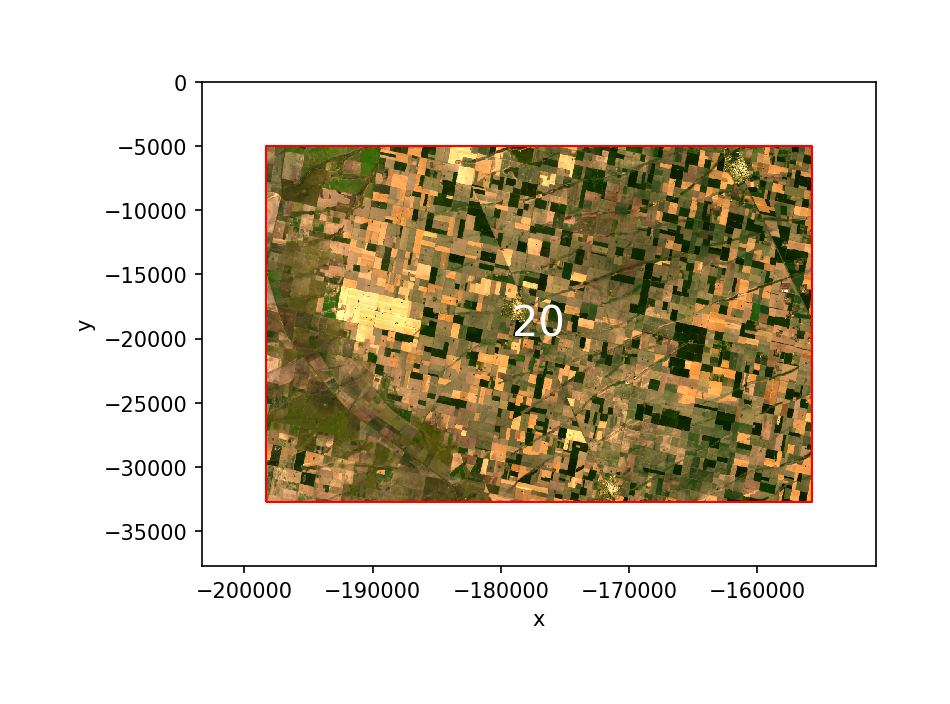

In [11]:
fig, ax = plt.subplots()

with gw.open(oli_2016_1213,
             band_names=['coastal', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2']) as src:

    src.sel(band=['red', 'green', 'blue']).plot.imshow(robust=True, ax=ax)
    
    # Get the image bounds with 5km of padding
    ylim = (src.gw.bottom-5000, src.gw.top+5000)
    xlim = (src.gw.left-5000, src.gw.right+5000)

    # Transform the UTM CRS to match the image CRS
    utm_df_albers = utm_df.to_crs(src.crs)
    
    # Remove empty geometries
    utm_df_albers = utm_df_albers[~utm_df_albers.geometry.centroid.is_empty]

    # Get intersecting UTM zones
    utm_df_albers_int = gpd.overlay(utm_df_albers, src.gw.geodataframe, how='intersection')    
    
ax.set_ylim(ylim)
ax.set_xlim(xlim)

# Plot the intersecting UTM zones
ax = utm_df_albers_int.plot(color='none', edgecolor='red', lw=1, ax=ax)
__ = utm_df_albers_int.apply(lambda x: ax.annotate(s=int(x.ZONE), xy=x.geometry.centroid.coords[0], ha='center', va='center', fontsize=20, color='white'), axis=1)

plt.tight_layout()

#### As we can see, the overlapping zone is 20. The EPSG code for UTM zones in the Southern hemisphere begins with 327. Therefore, the EPSG code for the transformation to UTM zone 20 in South America is 32720.

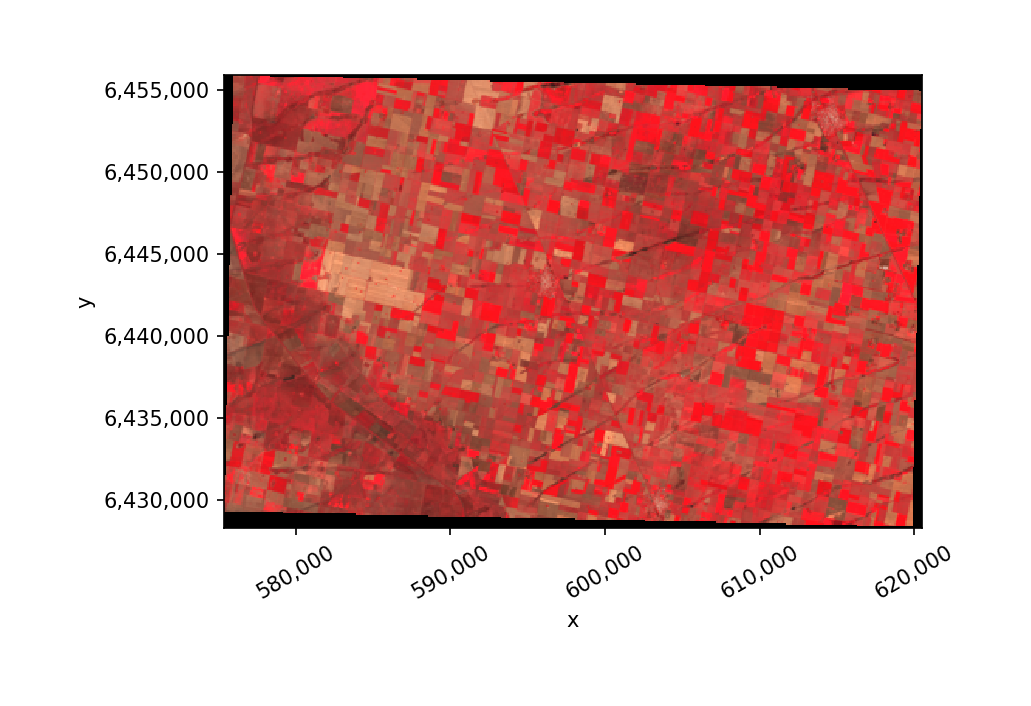

<Figure size 900x600 with 0 Axes>

In [12]:
with gw.open(oli_2016_1213,
             band_names=['coastal', 'blue', 'green', 'red', 'nir', 'swir1', 'swir2']) as src:

    # Transform to UTM zone 20S
    src_transformed = gw.transform_crs(src, dst_crs=32720, dst_res=(100, 100), resampling='cubic', num_threads=8)

    src_transformed.sel(band=['nir', 'red', 'green']).gw.imshow(robust=True)
    
plt.tight_layout()